**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl
import matplotlib.pyplot as plt

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(1994)

In [3]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

x = list(range(100))
x = array(x)
print(len(x))
print(type(x))

In [4]:
x = np.linspace(10,100,10)
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [5]:
errors

<function __main__.errors>

In [6]:
y = line(a=1,x=x,b=0,errors=errors)
y

array([  7.51495242,  21.1825762 ,  31.3982714 ,  30.98635702,
        47.58266772,  51.03767507,  66.91731223,  72.74223634,
        89.75400971,  91.1620672 ])

In [7]:
y_errors = errors(y)
y_errors

array([ 2.74134135,  4.60245328,  5.60341605,  5.56653905,  6.89801912,
        7.14406572,  8.18030025,  8.52890593,  9.47385928,  9.54788286])

Text(0,0.5,'endogenous')

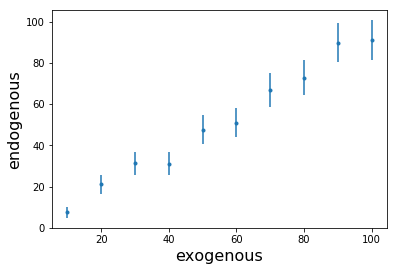

In [8]:
plt.errorbar(x,y,fmt='.',yerr=y_errors)
plt.xlabel('exogenous', fontsize = 16)
plt.ylabel('endogenous', fontsize = 16)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [9]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2296.
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           3.76e-12
Time:                        13:06:49   Log-Likelihood:                -27.038
No. Observations:                  10   AIC:                             56.08
Df Residuals:                       9   BIC:                             56.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9304      0.019     47.917      0.000         0.886     0.974
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.899
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.355
Skew:                          -0.059   Prob(JB):                        0.837
Kurtosis:                       2.084   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#THE RIGHT WAY
smfitDoneRight = sm.OLS(y, sm.add_constant(x)).fit()
smfitDoneRight.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     449.6
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           2.57e-08
Time:                        13:06:49   Log-Likelihood:                -27.002
No. Observations:                  10   AIC:                             58.00
Df Residuals:                       8   BIC:                             58.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.6652      2.750     -0.242      0.815        -7.008     5.677
x1             0.9399      0.044     21.203      0.000         0.838     1.042
==============================================================================
Omnibus:                        0.472   Durbin-Watson:                   2.921
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.489
Skew:                          -0.082   Prob(JB):                        0.783
Kurtosis:                       1.929   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Discussion: after add constant to x, the OLS Regression Results has one more parameter: const. At the same time, the fit line has a nonzero intercept, which is different from the model without adding constant to x.

# 4. plot the data (as points) and both statsmodels fits

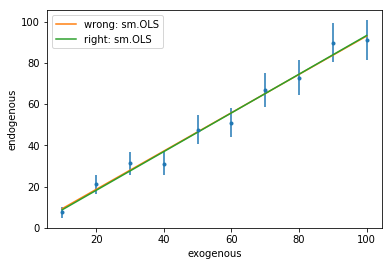

In [11]:
pl.errorbar(x, y, yerr=y_errors, fmt='.')
pl.plot(x, smfit.fittedvalues, '-', label="wrong: sm.OLS")
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="right: sm.OLS")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
plt.legend(loc='upper left')

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

# 6. repeat step 3 & 4

In [12]:
slope = 1
intercept = 100*slope

In [13]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [14]:
y2 = line(a=slope,x=x,b=intercept,errors=errors)
y2

array([ 107.57415525,  123.39059034,  130.96222555,  155.30248542,
        140.63917922,  163.02317198,  153.54106923,  181.70170293,
        186.13706103,  191.44127318])

In [15]:
y2_errors = errors(y2)
y2_errors

array([ 10.37179614,  11.10813172,  11.44387284,  12.46204178,
        11.85913906,  12.76805279,  12.391169  ,  13.4796774 ,
        13.64320567,  13.83623045])

Text(0,0.5,'endogenous')

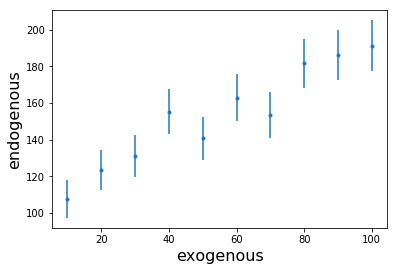

In [16]:
plt.errorbar(x,y2,fmt='.',yerr=y2_errors)
plt.xlabel('exogenous', fontsize = 16)
plt.ylabel('endogenous', fontsize = 16)

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [17]:
#THE WRONG WAY
smfit2 = smf.OLS(y2, x).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     81.86
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           8.18e-06
Time:                        13:06:49   Log-Likelihood:                -53.106
No. Observations:                  10   AIC:                             108.2
Df Residuals:                       9   BIC:                             108.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.3813      0.263      9.048      0.000         1.786     2.977
==============================================================================
Omnibus:                        1.900   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.809
Skew:                          -0.057   Prob(JB):                        0.667
Kurtosis:                       1.611   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#THE RIGHT WAY
smfitDoneRight2 = sm.OLS(y2, sm.add_constant(x)).fit()
smfitDoneRight2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           1.28e-05
Time:                        13:06:49   Log-Likelihood:                -34.498
No. Observations:                  10   AIC:                             73.00
Df Residuals:                       8   BIC:                             73.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        104.5437      5.821     17.961      0.000        91.122   117.966
x1             0.8878      0.094      9.464      0.000         0.671     1.104
==============================================================================
Omnibus:                        0.436   Durbin-Watson:                   3.042
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.096
Skew:                           0.198   Prob(JB):                        0.953
Kurtosis:                       2.728   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

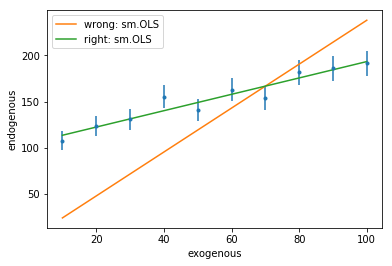

In [19]:
pl.errorbar(x, y2, yerr=y2_errors, fmt='.')
pl.plot(x, smfit2.fittedvalues, '-', label="wrong: sm.OLS")
pl.plot(x, smfitDoneRight2.fittedvalues, '-', label="right: sm.OLS")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
plt.legend(loc='upper left')

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [20]:
rm = sm.WLS(y, x).fit()
rm.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            WLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2296.
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           3.76e-12
Time:                        13:06:50   Log-Likelihood:                -27.038
No. Observations:                  10   AIC:                             56.08
Df Residuals:                       9   BIC:                             56.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9304      0.019     47.917      0.000         0.886     0.974
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.899
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.355
Skew:                          -0.059   Prob(JB):                        0.837
Kurtosis:                       2.084   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

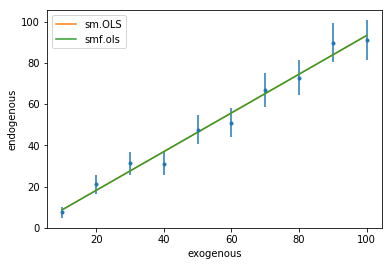

In [21]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=y_errors, fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();